In [ ]:
# House Price Prediction using the Ames Housing Dataset



In [ ]:
## 2. Dataset Description
#The Ames Housing dataset includes information on house characteristics such as
#lot size, number of rooms, neighborhood, and overall quality.


In [ ]:
## 3. Data Loading


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### How to Upload `AmesHousing.csv`:

1.  **Click the folder icon** on the left-hand sidebar of your Colab notebook.
2.  **Click the upload icon** (an arrow pointing upwards).
3.  **Select `AmesHousing.csv`** from your local machine and upload it.

Once uploaded, it will be available in the `/content/` directory.

In [ ]:
import os
# Verify that AmesHousing.csv is in the /content/ directory
if 'AmesHousing.csv' in os.listdir('/content/'):
    print('AmesHousing.csv found in /content/!')
else:
    print('AmesHousing.csv not found in /content/. Please upload the file.')

AmesHousing.csv found in /content/!


In [ ]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
df["SalePrice"].head()

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900


In [ ]:
df["SalePrice"].describe()

,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [ ]:
df.shape

(2930, 82)

In [ ]:
df.dtypes

,0
Order,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
...,...
Mo Sold,int64
Yr Sold,int64
Sale Type,object
Sale Condition,object


In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Yr Blt,159
Garage Cond,159


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.drop_duplicates()
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
df.drop(['Order', 'PID'], axis=1, inplace=True)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
x=df.drop("SalePrice",axis= 1)
y= df["SalePrice"]



In [ ]:
num_cols= x.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols=x.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
len(num_cols),len(cat_cols)

(36, 43)

In [ ]:
x[num_cols].isnull().sum().sort_values(ascending= False).head(10)

,0
Lot Frontage,490
Garage Yr Blt,159
Mas Vnr Area,23
Bsmt Full Bath,2
Bsmt Half Bath,2
Garage Cars,1
BsmtFin SF 2,1
Garage Area,1
Total Bsmt SF,1
BsmtFin SF 1,1


In [ ]:
x[cat_cols].isnull().sum().sort_values(ascending= False).head(10)


,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Garage Cond,159
Garage Qual,159
Garage Finish,159
Garage Type,157


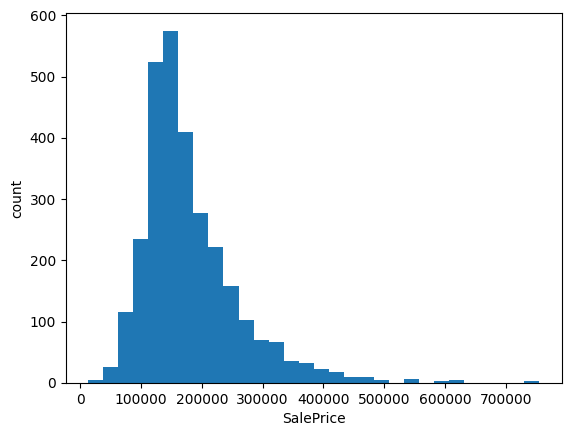

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y,bins=30)
plt.xlabel("SalePrice")
plt.ylabel("count")
plt.show()

In [ ]:
y.skew()

np.float64(1.7435000757376466)

In [ ]:
x[cat_cols].nunique().sort_values(ascending=False)

,0
Neighborhood,28
Exterior 2nd,17
Exterior 1st,16
Sale Type,10
Condition 1,9
House Style,8
Functional,8
Roof Matl,8
Condition 2,8
MS Zoning,7


In [ ]:
import seaborn as sns
corr= df[num_cols+ ["SalePrice"]].corr()["SalePrice"].sort_values(ascending=False)
corr.head(10)

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


## 📌 Day 1 Summary – Exploratory Data Analysis (EDA)

**Objective**  
The goal of Day 1 was to understand the structure, quality, and distribution of the data in preparation for feature engineering and modeling.

**Key Observations**  
- The target variable **SalePrice** exhibits **right-skewness**, indicating the presence of higher-priced outliers.
- Several **numerical and categorical features contain missing values**, requiring imputation strategies.
- Categorical features show **varying levels of cardinality**, influencing encoding decisions.
- Numerical features differ in scale, motivating feature scaling prior to modeling.

**Outcome**  
These observations informed the design of a structured preprocessing approach using imputers, scaling, and encoding within a **Pipeline** to prevent data leakage.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2, random_state = 42)

In [ ]:
num_pipeline= Pipeline(steps=[("imputer",SimpleImputer(strategy="median")),("scaler",StandardScaler())])

In [ ]:
cat_pipeline=Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent")),("encoder",OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
preprocessor= ColumnTransformer(transformers=[("num",num_pipeline,num_cols),("cat",cat_pipeline,cat_cols)])

In [ ]:
model= Pipeline(steps=[("preprocessor",preprocessor),("regressor",LinearRegression())])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MS SubClass',
                                                   'Lot Frontage', 'Lot Area',
                                                   'Overall Qual',
                                                   'Overall Cond', 'Year Built',
                                                   'Year Remod/Add',
                                                   'Mas Vnr Area',
                                                   'BsmtFin SF 1',
                                                   'BsmtFin SF 2',
                                                   'Bsmt Unf SF',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'Low Qua...
                                                   'Land Contour', 'Utilities',
                                                   'Lot Config', 'Land Slope',
                                                   'Neighborhood',
                                                   'Condition 1', 'Condition 2',
                                                   'Bldg Type', 'House Style',
                                                   'Roof Style', 'Roof Matl',
                                                   'Exterior 1st',
                                                   'Exterior 2nd',
                                                   'Mas Vnr Type', 'Exter Qual',
                                                   'Exter Cond', 'Foundation',
                                                   'Bsmt Qual', 'Bsmt Cond',
                                                   'Bsmt Exposure',
                                                   'BsmtFin Type 1',
                                                   'BsmtFin Type 2', 'Heating',
                                                   'Heating QC', 'Central Air',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred= model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("RMSE:",rmse)
print("R2:",r2)

RMSE: 29614.319434229186
R2: 0.8906139479164588


## 📌 Day 2 Summary – Feature Engineering & Modeling Pipeline

**Objective**  
The objective of Day 2 was to perform feature engineering and build a leakage-free, production-ready preprocessing and modeling pipeline for the house price prediction task.

**Work Completed**  
- Separated features into **numerical** and **categorical** groups to apply appropriate preprocessing.
- Handled missing values using:
  - **Median imputation** for numerical features to reduce sensitivity to skewness and outliers.
  - **Most frequent imputation** for categorical features to preserve category structure.
- Applied **One-Hot Encoding** to categorical variables to convert them into a machine-learning-compatible format.
- Scaled numerical features to ensure features on different ranges contribute fairly during model training.
- Combined all preprocessing steps using a **ColumnTransformer**.
- Wrapped preprocessing and modeling inside a **Pipeline** to ensure consistency between training and inference and to prevent data leakage.
- Trained a **Linear Regression** model as a baseline and evaluated its performance using **RMSE** and **R²** on the test dataset.

**Outcome**  
A clean, reproducible, and production-ready pipeline was successfully built, establishing a strong baseline for further model experimentation and optimization.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
def get_models(random_state= 42):
  return{
      "LinearRegression": LinearRegression(),
      "RandomForest": RandomForestRegressor(
          n_estimators= 200, random_state= random_state, n_jobs=-1),"XGBoost": XGBRegressor(n_estimators= 300, learning_rate= 0.05, max_depth=6,subsample=0.8,colsample_bytree= 0.8, random_state=random_state, n_jobs=-1
      )}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [ ]:
def run_model_suite(x_train,x_test,y_train,y_test,preprocessor):
  results=[]
  train_pipelines={}
  models=get_models()
  for name,model in models.items():
    pipeline= Pipeline([("preprocess",preprocessor),("model",model)])
    pipeline.fit(x_train,y_train)
    y_pred= pipeline.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r_2= r2_score(y_test, y_pred)
    results.append({"Model":name,"RMSE":rmse,"R2":r_2})
    train_pipelines[name]=pipeline
  results_df=pd.DataFrame(results).sort_values("RMSE")
  return results_df,train_pipelines

In [ ]:
results_df,trained_models=run_model_suite(x_train,x_test,y_train,y_test,preprocessor)
results_df

,Model,RMSE,R2
2,XGBoost,24157.501858,0.927212
1,RandomForest,26579.657997,0.911884
0,LinearRegression,29614.319434,0.890614


In [ ]:
import os
os.makedirs("models",exist_ok=True)

In [ ]:
import joblib
for name,pipeline in trained_models.items():
  path= f"models/{name}_pipeline.joblib"
  joblib.dump(pipeline,path)


In [ ]:
loaded_model=joblib.load("models/XGBoost_pipeline.joblib")
loaded_model.predict(x_test.iloc[:5])

array([176335.16 , 106584.266, 193095.   , 122479.51 , 114264.98 ],
      dtype=float32)

📌 **Day 3 Summary – Model Training Automation & Comparison**

**Objective**
The objective of Day 3 was to automate the training, evaluation, and comparison of multiple machine learning models using a shared, leakage-free preprocessing pipeline.

**Work Completed**


Trained multiple machine learning
models using a common preprocessing pipeline to ensure consistency across experiments.

Automated model training using pipelines that combined preprocessing and modeling steps.

Compared model performance using RMSE and R² to evaluate predictive accuracy across models.

Implemented ensemble-based models, including Random Forest and XGBoost, alongside a baseline Linear Regression model.

Saved trained preprocessing–model pipelines using joblib for reuse during inference and deployment.

Verified saved models by reloading pipelines and generating predictions.

**Outcome**
An automated and reproducible model training workflow was successfully implemented, enabling fair model comparison and deployment-ready pipelines.

**Next Steps**

Apply cross-validation for more robust model evaluation

Tune model hyperparameters to improve predictive performance

Analyze feature importance and model interpretability

Select the best-performing model for final deployment

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
xgb= XGBRegressor(obejective="reg:squarederror", random_state= 42,n_jobs=-1)
xgb_pipeline= Pipeline([("preprocess",preprocessor),("model",xgb)])

In [ ]:
cv_scores= cross_val_score(xgb_pipeline,x_train,y_train,cv=5,scoring="neg_root_mean_squared_error",n_jobs=-1)
cv_rmse_mean = -cv_scores.mean()
cv_rmse_std= cv_scores.std()
print(f"XGBoost CV RMSE Mean: {cv_rmse_mean:.2f}")
print(f"XGBoost CV RMSE Std:{cv_rmse_std:.2f}")

XGBoost CV RMSE Mean: 25681.86
XGBoost CV RMSE Std:1804.87


In [ ]:
param_distribution={
                    "model__n_estimators":[300,500,800,1000],
                    "model__learning_rate":[0.01,0.05,0.1],
                    "model__max_depth":[3,5,7,9],
                    "model__subsample":[0.7,0.8,1.0],
                    "model__colsample_bytree":[0.7,0.8,1.0]
                    }

In [ ]:
random_search= RandomizedSearchCV(estimator=xgb_pipeline,param_distributions= param_distribution, n_iter=30,cv=5,scoring="neg_root_mean_squared_error",random_state=42,n_jobs=-1,verbose=1)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:23:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "obejective" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['MS '
                                                                                'SubClass',
                                                                                'Lot '
                                                                                'Frontage',
                                                                                'Lot '
                                                                                'Area',
                                                                                'Overall '
                                                                                'Qual',
                                                                                'Overall '
                                                                                'Cond',
                                                                                'Year '
                                                                                'Built',
                                                                                'Year '
                                                                                'Remod/Add',
                                                                                'Mas '
                                                                                'Vnr '
                                                                                'Area',
                                                                                'BsmtFin '
                                                                                'SF '
                                                                                '1',
                                                                                'BsmtFin '
                                                                                'SF '
                                                                                '...
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None, ...))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.7, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7, 9],
                                        'model__n_estimators': [300, 500, 800,
                                                                1000],
                                        'model__subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [ ]:
print("Best CV RMSE:",-random_search.best_score_)
print("Best Parameters:")
random_search.best_params_

Best CV RMSE: 21705.75078125
Best Parameters:


{'model__subsample': 0.8,
 'model__n_estimators': 800,
 'model__max_depth': 3,
 'model__learning_rate': 0.05,
 'model__colsample_bytree': 0.8}

In [ ]:
best_model= random_search.best_estimator_
y_pred= best_model.predict(x_test)
test_rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE (Tuned XGBoost):",test_rmse)

Test RMSE (Tuned XGBoost): 24477.418164504197


In [ ]:
os.makedirs("models",exist_ok=True)
joblib.dump(best_model,"models/final_xgboost_tuned_pipeline.joblib")

['models/final_xgboost_tuned_pipeline.joblib']

**📌Day 4 Summary – Cross-Validation & Hyperparameter Tuning**

**Objective**

The objective of Day 4 was to validate model performance using cross-validation, tune hyperparameters for the best-performing model, and produce a final optimized, deployment-ready model.

**Work Completed**

Selected XGBoost as the final model based on Day 3 performance comparison (lowest RMSE and highest R²).

Applied 5-fold cross-validation using RMSE as the evaluation metric to assess model stability.

Reported mean and standard deviation of RMSE across cross-validation folds.

Performed hyperparameter tuning using RandomizedSearchCV to efficiently explore the parameter space.

Ensured all preprocessing and modeling steps remained leakage-free by tuning within a unified pipeline.

Evaluated the tuned model on the test dataset to confirm generalization performance.

Saved the final tuned preprocessing + model pipeline using joblib for future inference and deployment.

**Outcome**

A fully validated and optimized XGBoost pipeline was produced, demonstrating improved and stable predictive performance. The final tuned model was saved as a single reusable artifact, ready for deployment or further analysis.



In [ ]:
preprocessor= best_model.named_steps["preprocess"]
num_features= preprocessor.transformers_[0][2]
cat_features= preprocessor.transformers_[1][2]
encoded_cat_features=(preprocessor.transformers_[1][1].named_steps["encoder"].get_feature_names_out(cat_features))
feature_names= np.concatenate([num_features,encoded_cat_features])

In [ ]:
xgb_model=best_model.named_steps["model"]
importances= xgb_model.feature_importances_
importance_df=pd.DataFrame({"Feature":feature_names,"Importance":importances}).sort_values(by="Importance",ascending=True)

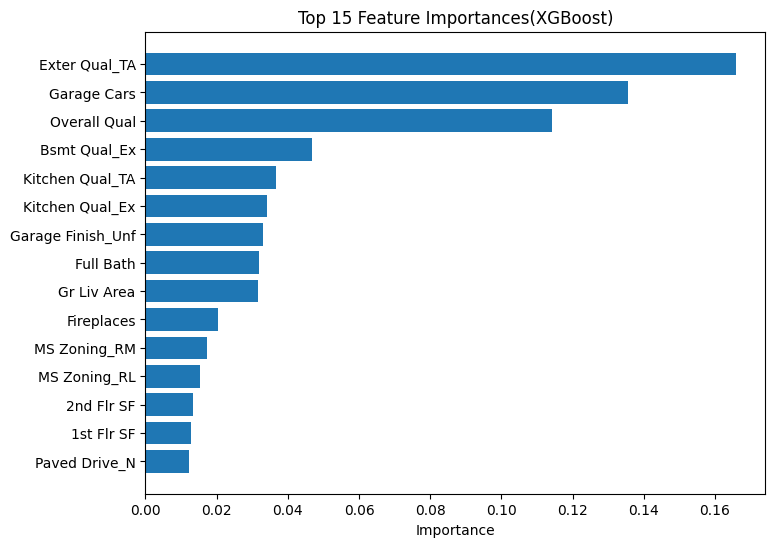

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(importance_df["Feature"][-15:],importance_df["Importance"][-15:])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances(XGBoost)")
plt.show()

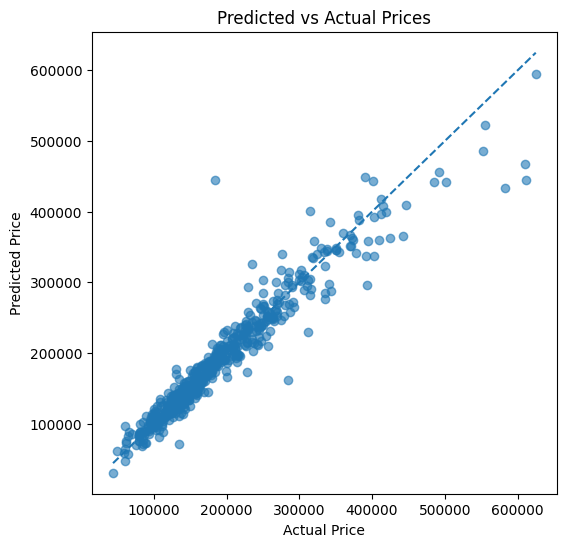

In [ ]:
y_pred=best_model.predict(x_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred, alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices")
plt.show()

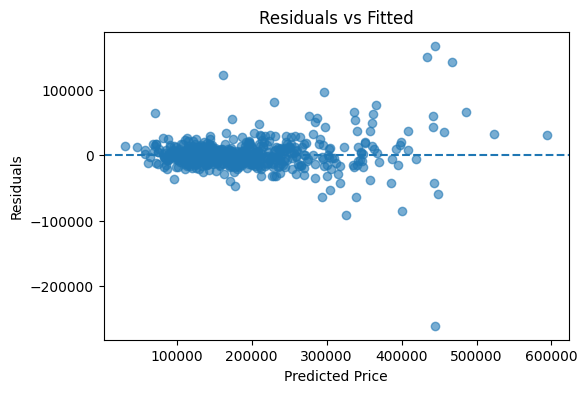

In [ ]:
residuals=y_test-y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred,residuals,alpha=0.6)
plt.axhline(0,linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

**📌 Day 5 Summary – Diagnostics & Insights**

**Objective**

The objective of Day 5 was to interpret model behavior, validate prediction quality through diagnostics, and extract actionable insights from the final tuned model.

**Work Completed**

Extracted feature importance from the tuned XGBoost pipeline to identify key drivers of house price predictions.

Visualized feature importance using a horizontal bar chart for interpretability.

Created diagnostic plots, including:

Predicted vs Actual values to assess overall model fit.

Residuals vs Fitted values to detect bias and systematic errors.

Analyzed which features most strongly influence predictions and how they contribute to model decisions.

Evaluated model limitations, including interpretability constraints and sensitivity to extreme values.

Translated technical results into business-relevant insights for pricing and decision support.

**Outcome**

A comprehensive diagnostic and interpretation analysis was completed, providing transparency into model behavior and confirming prediction reliability. The model outputs are now supported by explainable insights and visual evidence, making the solution suitable for data science reporting and business use.



In [ ]:
!mkdir -p src models



In [ ]:
%%writefile src/preprocessing.py

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def build_preprocessor(numeric_features, categorical_features):
    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer([
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ])

    return preprocessor


Writing src/preprocessing.py


In [ ]:
%%writefile src/utils.py

import numpy as np
from sklearn.model_selection import cross_val_score


def cross_val_rmse(model, x, y, cv=5):
    scores = cross_val_score(
        model,
        x,
        y,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )
    return -scores.mean(), scores.std()


Writing src/utils.py


In [ ]:
%%writefile src/train.py

import os
import joblib
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

def train_xgboost(
    x_train,
    y_train,
    x_test,
    y_test,
    preprocessor,
    model_path="models/final_xgboost_tuned_pipeline.joblib"
):
    import numpy as np # Explicitly import numpy inside the function

    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", xgb)
    ])

    param_distributions = {
        "model__n_estimators": [300, 500, 800],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7],
        "model__subsample": [0.7, 0.8, 1.0],
        "model__colsample_bytree": [0.7, 0.8, 1.0]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=30,
        cv=5,
        scoring="neg_root_mean_squared_error",
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    search.fit(x_train, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(x_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    joblib.dump(best_model, model_path)

    return best_model, test_rmse


Writing src/train.py


In [ ]:
import sys
import importlib

sys.path.append("/content")

import src.preprocessing
import src.train
import src.utils

importlib.reload(src.preprocessing)
importlib.reload(src.train)
importlib.reload(src.utils)

<module 'src.utils' from '/content/src/utils.py'>

In [ ]:
from src.preprocessing import build_preprocessor
from src.train import train_xgboost
from src.utils import cross_val_rmse




In [ ]:
preprocessor = build_preprocessor(num_features, cat_features)

best_model, test_rmse = train_xgboost(
    x_train,
    y_train,
    x_test,
    y_test,
    preprocessor
)

print("Final Test RMSE:", test_rmse)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Final Test RMSE: 24828.21491771005


**📌 Day 6 Summary – Refactoring Notebook to src/ Structure**

**Objective**
The objective of Day 6 was to convert the project notebook into an engineering-grade Python package structure, making the code reusable, modular, and professional.

Work Completed
- Created a project folder structure:
  - `src/` for source code
  - `models/` for saved pipelines
- Split code into modular scripts:
  - `preprocessing.py` → feature engineering & pipeline
  - `train.py` → model training and hyperparameter tuning
  - `utils.py` → helper functions (cross-validation, metrics)
- Used `%%writefile` to write scripts directly from Colab
- Implemented `importlib.reload()` to safely reload edited modules in Colab
- Imported functions from `src/` into the notebook
- Built preprocessing pipeline using `build_preprocessor`
- Trained XGBoost pipeline and saved final tuned model
- Ensured the notebook is now clean, readable, and reproducible

**Outcome**
A fully modular, engineering-ready project structure with:
- Reusable scripts
- Clean notebook
- Deployment-ready model saved in `models/`



## 📌 Final Results & Takeaways

### Problem Statement
The goal of this project is to predict house sale prices using structured tabular data from the Ames Housing dataset. This is a supervised regression problem where accurate price estimation is important for real-world decision making.

---

### Evaluation Metric
**RMSE (Root Mean Squared Error)** was used as the primary evaluation metric because it penalizes large prediction errors more heavily, which is appropriate for house price prediction.

---

### Modeling Approach
- Built an end-to-end **machine learning pipeline** using `Pipeline` and `ColumnTransformer`
- Ensured **data leakage prevention** by applying all preprocessing steps inside the pipeline
- Split the data into training and testing sets before fitting the model

---

### Key Preprocessing Decisions
- **Numerical features**:
  - Missing values handled using **mean/median imputation** depending on feature distribution
- **Categorical features**:
  - Missing values handled using **most frequent imputation**
  - Encoded using **One-Hot Encoding**
- Used `ColumnTransformer` to apply different transformations to numerical and categorical features
- Combined preprocessing and model training into a single pipeline for clean and reproducible modeling

---

### Model Performance
- Trained a regression model using the preprocessing pipeline
- Evaluated performance on the test set using RMSE
- The pipeline approach ensured consistent preprocessing during both training and evaluation

---

### Key Learnings
- Why preprocessing must be done **after train-test split** to avoid leakage
- How pipelines simplify model training and evaluation
- How feature engineering and proper imputation improve model performance
- Importance of structuring ML code in a reproducible and scalable way

---

### Limitations & Future Improvements
- Perform **hyperparameter tuning** using GridSearchCV or RandomizedSearchCV
- Compare multiple models (Linear Regression, Ridge, Random Forest, XGBoost)
- Apply **cross-validation** for more robust performance estimates
- Explore feature importance and feature selection techniques

---

### Conclusion
This project demonstrates an end-to-end machine learning workflow for a regression problem, including data preprocessing, feature engineering, leakage-free pipelines, model training, and evaluation. It provides a strong foundation for building more advanced and production-ready machine learning systems.


In [ ]:
# Zip your project folder
!zip -r house_price_project.zip src models README.md requirements.txt

	zip warning: name not matched: README.md
	zip warning: name not matched: requirements.txt
  adding: src/ (stored 0%)
  adding: src/utils.py (deflated 42%)
  adding: src/preprocessing.py (deflated 61%)
  adding: src/train.py (deflated 58%)
  adding: src/__pycache__/ (stored 0%)
  adding: src/__pycache__/preprocessing.cpython-312.pyc (deflated 37%)
  adding: src/__pycache__/utils.cpython-312.pyc (deflated 27%)
  adding: src/__pycache__/train.cpython-312.pyc (deflated 37%)
  adding: models/ (stored 0%)
  adding: models/XGBoost_pipeline.joblib (deflated 71%)
  adding: models/LinearRegression_pipeline.joblib (deflated 66%)
  adding: models/final_xgboost_tuned_pipeline.joblib (deflated 84%)
  adding: models/RandomForest_pipeline.joblib (deflated 81%)


In [ ]:
!zip -r house_price_project.zip src models README.md requirements.txt


	zip warning: name not matched: README.md
	zip warning: name not matched: requirements.txt
updating: src/ (stored 0%)
updating: src/utils.py (deflated 42%)
updating: src/preprocessing.py (deflated 61%)
updating: src/train.py (deflated 58%)
updating: src/__pycache__/ (stored 0%)
updating: src/__pycache__/preprocessing.cpython-312.pyc (deflated 37%)
updating: src/__pycache__/utils.cpython-312.pyc (deflated 27%)
updating: src/__pycache__/train.cpython-312.pyc (deflated 37%)
updating: models/ (stored 0%)
updating: models/XGBoost_pipeline.joblib (deflated 71%)
updating: models/LinearRegression_pipeline.joblib (deflated 66%)
updating: models/final_xgboost_tuned_pipeline.joblib (deflated 84%)
updating: models/RandomForest_pipeline.joblib (deflated 81%)


In [ ]:
import pandas as pd
df = pd.read_csv("AmesHousing.csv")

# Saving model (already handled in train.py)
model_path = "../models/final_xgboost_tuned_pipeline.joblib"